In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


In [2]:
df= pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_2_25FEB24/sample_mmp.csv")


/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_6327/721220104.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_2_25FEB24/sample_mmp.csv")


In [3]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [4]:
df.shape

(500000, 84)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [7]:

tipos = df.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


int64: 18
object: 30
float64: 36


In [8]:
TARGET = 'HasDetections'

In [9]:
df[TARGET].mean()

0.499906

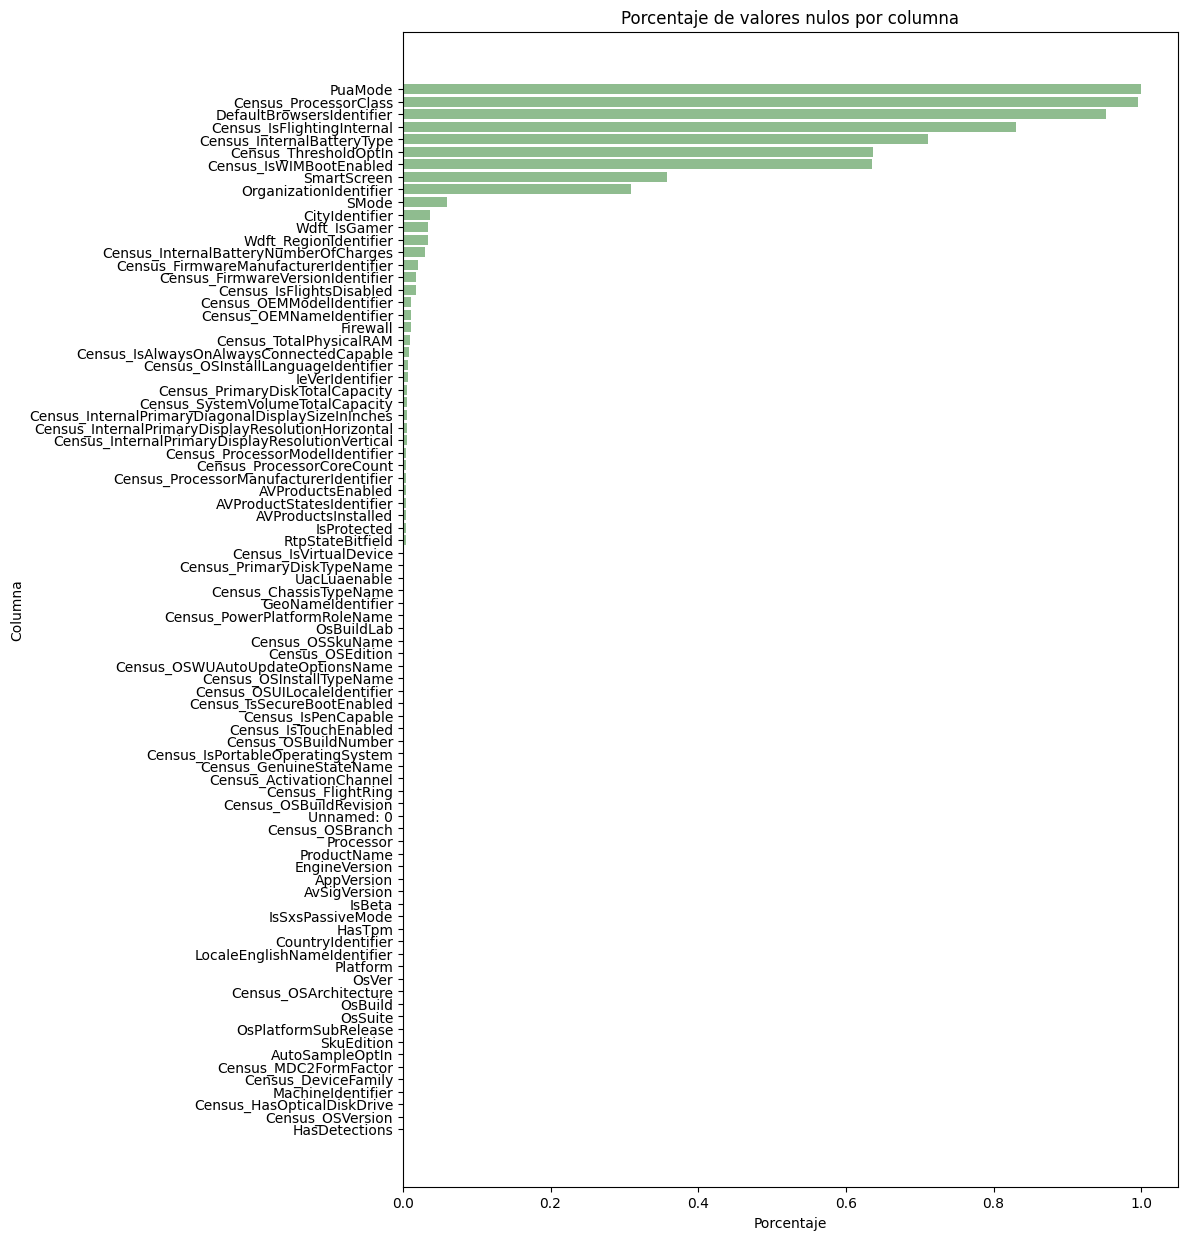

In [10]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='darkseagreen')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


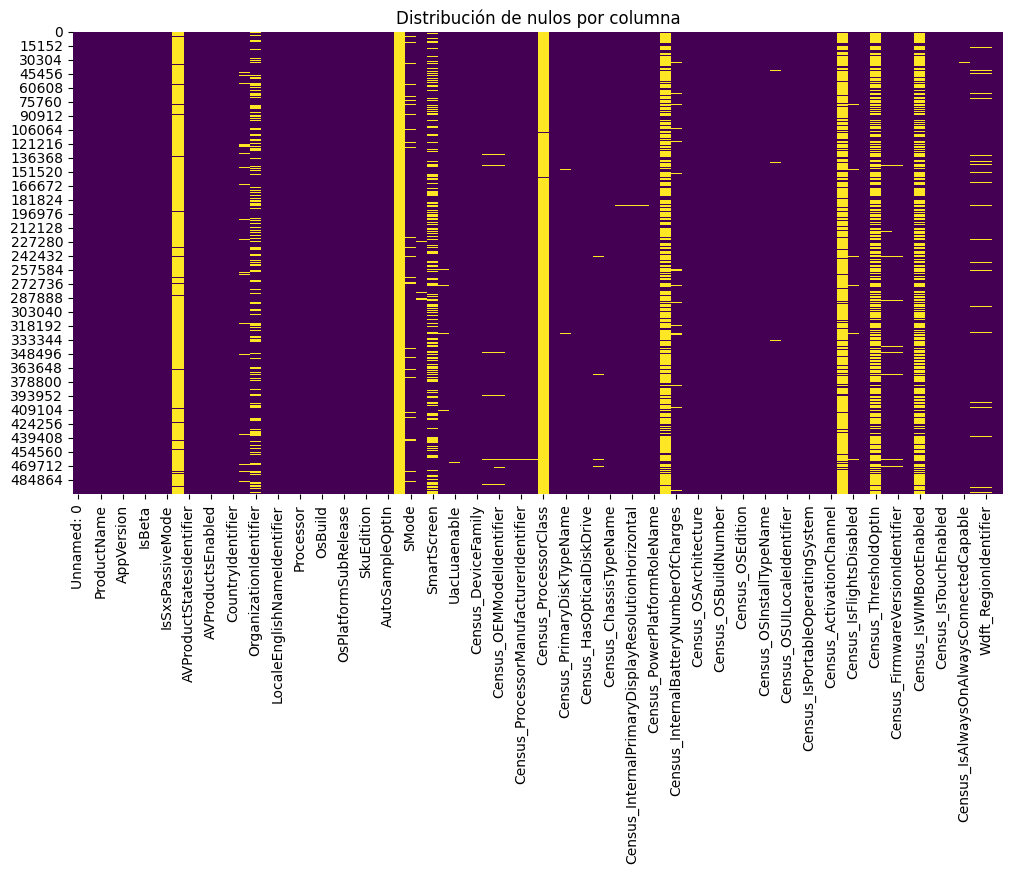

In [11]:
# Distribución de nulos 
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

In [12]:
#Creo una copia del dataset 
df2=df.copy()

In [13]:
#Compruebo las columnas que únicamente tienen 2 valores únicos 
var_bol = df2.nunique() == 2
columnas_con_dos = var_bol.loc[var_bol].index
columnas_con_dos

Index(['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'IsProtected',
       'AutoSampleOptIn', 'SMode', 'Firewall', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightingInternal',
       'Census_IsFlightsDisabled', 'Census_ThresholdOptIn',
       'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice',
       'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'HasDetections'],
      dtype='object')

/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_6327/2401301494.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral')


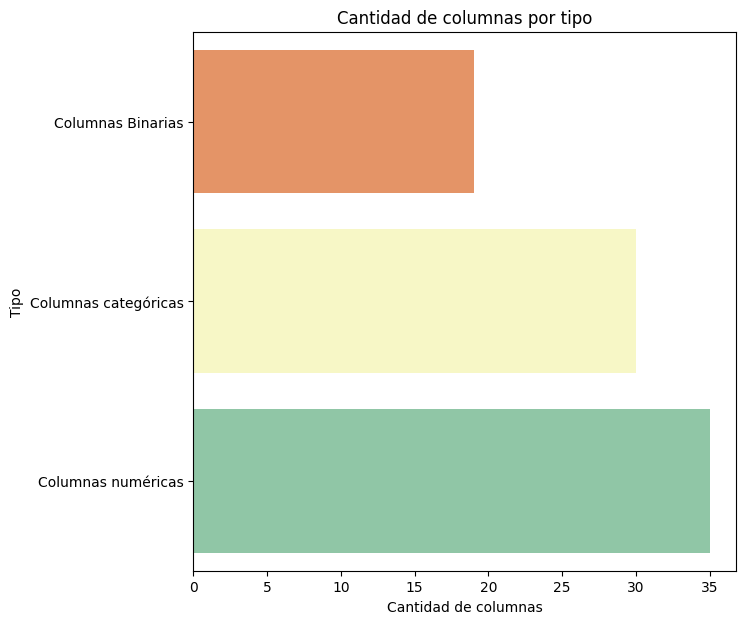

In [14]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df2.columns, 'Número de registros': df2.count(), 'Total': len(df2)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df2.columns, 'Cardinality': df2.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df2.columns if df2[col].nunique() == 2]
true_numerical_columns = [col for col in df2.columns if pd.api.types.is_numeric_dtype(df2[col]) and col not in binary_columns]
categorical_columns = [col for col in df2.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral')

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



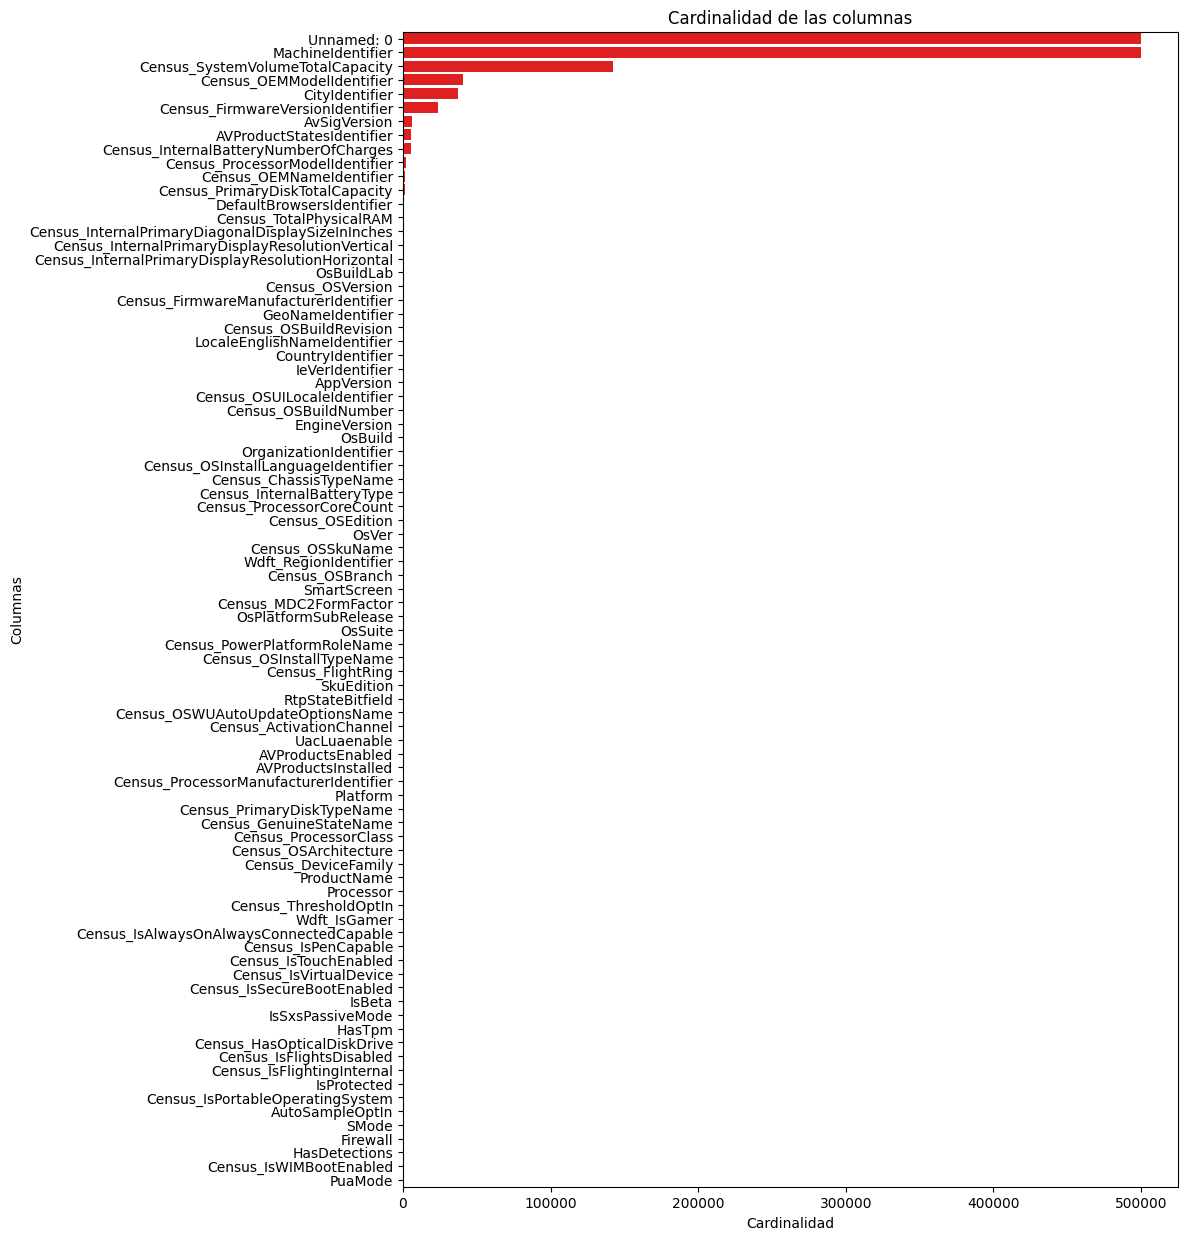

In [15]:
# Calcular la cardinalidad de cada columna
cardinalidad = df2.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad, color='red')

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [16]:
#true_numerical_columns = df2.select_dtypes(include=['number']).columns

# Distribución de valores por columna
#for col in true_numerical_columns:
    #plt.figure(figsize=(5, 4))
    #sns.displot(df2[col], kind="kde")
    #plt.title(f"Distribución de {col}")
    #plt.show()

In [17]:
# Detectar filas duplicadas
duplicados = df2.duplicated()

# Mostrar las filas duplicadas
df2[duplicados]


,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections


In [18]:
#TO DELETE
#Bucle para ver los diferentes atributos de cada columna y su tipo
for columna in df2.columns:
    # Calcula el número de valores únicos y muestra el resultado
    num_valores_unicos = df2[columna].nunique()
    
    # Obtiene el tipo de columna
    tipo_columna = df2[columna].dtype
    
    print(f"Columna: {columna}, Atributos diferentes: {num_valores_unicos}, Tipo: {tipo_columna}")
    print("\n")  # Salto de línea para separar los resultados de cada columna

Columna: Unnamed: 0, Atributos diferentes: 500000, Tipo: int64


Columna: MachineIdentifier, Atributos diferentes: 500000, Tipo: object


Columna: ProductName, Atributos diferentes: 3, Tipo: object


Columna: EngineVersion, Atributos diferentes: 53, Tipo: object


Columna: AppVersion, Atributos diferentes: 95, Tipo: object


Columna: AvSigVersion, Atributos diferentes: 6455, Tipo: object


Columna: IsBeta, Atributos diferentes: 2, Tipo: int64


Columna: RtpStateBitfield, Atributos diferentes: 7, Tipo: float64


Columna: IsSxsPassiveMode, Atributos diferentes: 2, Tipo: int64


Columna: DefaultBrowsersIdentifier, Atributos diferentes: 554, Tipo: float64


Columna: AVProductStatesIdentifier, Atributos diferentes: 5516, Tipo: float64


Columna: AVProductsInstalled, Atributos diferentes: 5, Tipo: float64


Columna: AVProductsEnabled, Atributos diferentes: 5, Tipo: float64


Columna: HasTpm, Atributos diferentes: 2, Tipo: int64


Columna: CountryIdentifier, Atributos diferentes: 222, Tipo: i

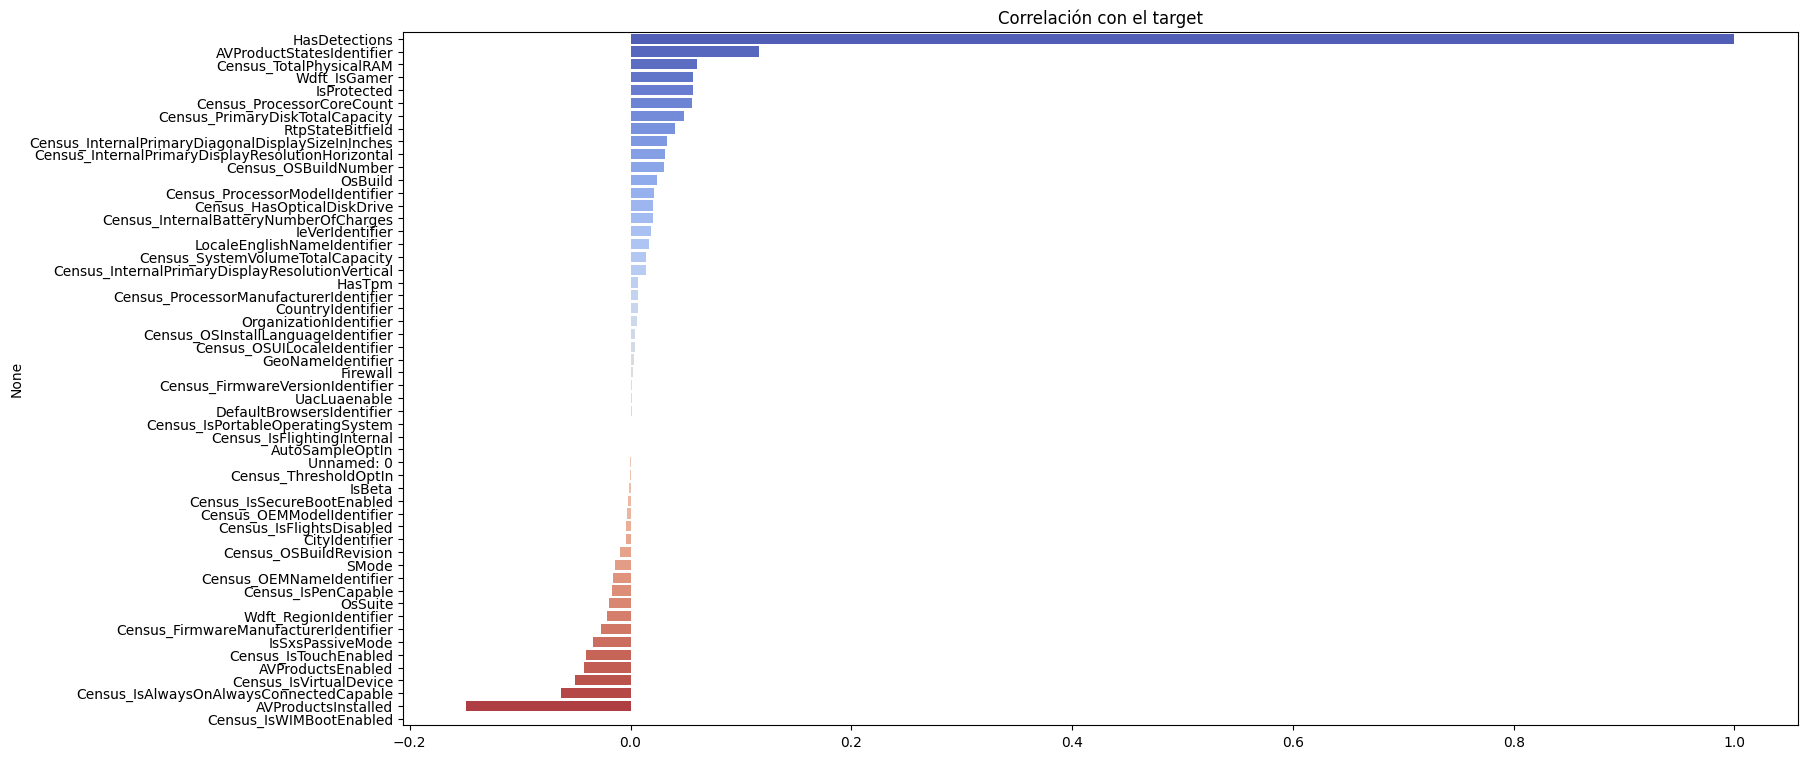

In [19]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df2.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [20]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [21]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df2)


In [22]:
lista_boolean

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [23]:
# Generar un boxplot para cada columna booleana
""" for columna in lista_boolean:
  sns.boxplot(x=columna, y='HasDetections', data=df2)
  plt.title(f'Distribución de {columna} en relación con HasDetections')
  plt.show()
"""

" for columna in lista_boolean:\n  sns.boxplot(x=columna, y='HasDetections', data=df2)\n  plt.title(f'Distribución de {columna} en relación con HasDetections')\n  plt.show()\n"

### Limpieza

In [24]:
#Compruebo las columnas que únicamente tienen 1 valor 
num_valores_unicos = df.nunique()
columnas_con_un_atributo = num_valores_unicos[num_valores_unicos == 1].index
columnas_con_un_atributo



Index(['PuaMode', 'Census_IsWIMBootEnabled'], dtype='object')

In [25]:
#df2.drop(columnas_con_un_atributo, axis=1, inplace=True)

In [26]:
#Creo una función para sacar aquellas columnas con un porcentaje de nulos superior al 75%
def identificar_columnas_con_nulos(df, umbral_porcentaje=75):
    porc_nulos = df2.isnull().mean() * 100
    columnas_con_nulos = porc_nulos[porc_nulos > umbral_porcentaje].index.tolist()
    return columnas_con_nulos

In [27]:
columns_to_delete= identificar_columnas_con_nulos(df2)
columns_to_delete

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_IsFlightingInternal']

In [28]:
#df2.drop(columns_to_delete, axis=1, inplace=True)

In [29]:
df2.head(2)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0


In [30]:
def convertir_columnas_boolean(df, columnas_boolean):
    """Convierte las columnas especificadas a tipo booleano en un DataFrame."""
    for columna in columnas_boolean:
        df[columna] = df[columna].astype(bool)

# Lista de columnas booleanas obtenida de la función get_var_list
lista_boolean = get_var_list(df2)[1]  # Extraemos la lista booleana del resultado

# Convertir las columnas booleanas a tipo bool
convertir_columnas_boolean(df2, lista_boolean)


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  bool   
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  bool  

In [32]:

#Eliminar las columnas
#df2 = df2.drop(columns=columnas_a_eliminar, axis=1)


In [33]:
df2= df2.reset_index()

In [34]:
#  Filtra un DataFrame por los valores que tienen una frecuencia superior al porcentaje mínimo especificado en una columna.

def filtrar_por_valores_frecuentes(df, columna, porcentaje_minimo=1):


  # Contar la frecuencia de cada valor único en la columna
  conteos = df[columna].value_counts()

  # Calcular el porcentaje de cada valor único
  porcentajes = conteos / len(df) * 100

  # Filtrar los valores con un porcentaje inferior al mínimo
  valores_frecuentes = porcentajes[porcentajes > porcentaje_minimo].index

  # Filtrar el DataFrame original para incluir solo las filas con valores frecuentes
  df_filtrado = df[df[columna].isin(valores_frecuentes)]

  return df_filtrado


df_filtrado = filtrar_por_valores_frecuentes(df2, "UacLuaenable", 1)




In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     # Mostrar todas las filas

df2.head().T

,0,1,2,3,4
index,0,1,2,3,4
Unnamed: 0,8427007,8829090,2731904,1359513,236059
MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269
ProductName,win8defender,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,1.1.15200.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0,1.275.511.0
IsBeta,False,False,False,False,False
RtpStateBitfield,7.0,7.0,7.0,7.0,7.0
IsSxsPassiveMode,False,False,False,False,False


In [36]:
df['AvSigVersion'].value_counts()

AvSigVersion
1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
1.273.1826.0    4744
1.275.1244.0    4487
1.251.42.0      4258
1.275.1209.0    3787
1.273.810.0     3708
1.237.0.0       3534
1.273.1749.0    3508
1.273.1379.0    2789
1.273.1005.0    2747
1.273.894.0     2540
1.273.781.0     2409
1.273.461.0     2332
1.273.337.0     2219
1.273.1527.0    2218
1.275.948.0     2170
1.275.1293.0    2086
1.273.1167.0    2081
1.273.717.0     2060
1.273.950.0     1979
1.275.1487.0    1923
1.275.1025.0    1916
1.273.1034.0    1872
1.275.511.0     1807
1.273.1112.0    1796
1.273.1311.0    1769
1.275.981.0     1738
1.275.1011.0    1732
1.273.1795.0    1730
1.275.1669.0    1708
1.275.974.0     1683
1.275.112.0     1670
1.273.1056.0    1654
1.275.263.0     1633
1.273.665.0     1628
1.275.1086.0    1615
1.273.1282.0    1605
1.273.1574.0    1551
1.273.1073.0    1523
1.273.1668.0    1497
1.273.933.0     1484
1.275.1458.0    1468
1.275.1349.0    1448


In [37]:
#Elimino las columnas con mucha cardinalidad a excepción de AvSigVersion , MachineIdentifier, Census_SystemVolumeTotalCapacity, y Census_TotalPhysicalRAM

In [38]:
lista_boolean

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [39]:
lista_numericas

['Unnamed: 0',
 'RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightingInternal',
 'Census_Is

In [40]:
df2['IsProtected'].value_counts()

IsProtected
1.0    471073
0.0     27001
Name: count, dtype: int64

In [41]:
lista_categoricas

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [42]:
columns_to_kill = ['AutoSampleOptIn',
'Census_InternalBatteryNumberOfCharges',
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
'Census_ProcessorClass',
'Census_ThresholdOptIn',
'DefaultBrowsersIdentifier',
'IsBeta',
'ProductName',
'PuaMode',
'UacLuaenable',
'Unnamed: 0']

In [43]:
columns_to_drop = [col for col in columns_to_kill if col in df2.columns]
df2 = df2.drop(columns = columns_to_drop)

In [52]:
df2.head()

,index,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,f1cd864e97bae82bdf96523e1a539121,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,False,53447.0,1.0,1.0,True,8,85219.0,NaN,205.0,172,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,137.0,RequireAdmin,1.0,Desktop,Windows.Desktop,1443.0,275891.0,4.0,5.0,2273.0,953869.0,HDD,952838.0,False,8192.0,AllinOne,23.0,1920.0,1080.0,Desktop,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,27.0,120,FullAuto,False,IS_GENUINE,OEM:DM,Retail,355.0,19951.0,False,0.0,False,False,0.0,0.0,11.0,1
1,1,fd5ba6f5b75325ec0423a6c67cc75942,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,False,53447.0,1.0,1.0,True,129,54198.0,NaN,126.0,124,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,137.0,RequireAdmin,1.0,Notebook,Windows.Desktop,2102.0,248850.0,4.0,5.0,2660.0,476940.0,HDD,457600.0,False,8192.0,Notebook,13.2,1280.0,720.0,Mobile,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,18.0,72,FullAuto,False,IS_GENUINE,OEM:DM,Retail,486.0,48753.0,False,0.0,False,False,0.0,1.0,3.0,0
2,2,4e628391e7cc7c482fb3286f486dbd25,1.1.15100.1,4.9.10586.1106,1.273.781.0,7.0,False,46781.0,2.0,1.0,True,149,122689.0,27.0,181.0,56,windows10,x64,10.0.0.0,10586,768,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,1.0,0.0,74.0,RequireAdmin,1.0,Convertible,Windows.Desktop,2206.0,238234.0,4.0,5.0,2998.0,244198.0,SSD,221251.0,False,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,10.0.10586.1176,amd64,th2_release_sec,10586,1176,Core,CORE,Update,24.0,109,Notify,False,IS_GENUINE,Retail,Retail,554.0,33111.0,True,0.0,True,True,0.0,0.0,15.0,0
3,3,270a2e9d028144a4df12a9e3da79fba5,1.1.15200.1,4.18.1807.18075,1.275.1639.0,7.0,False,53447.0,1.0,1.0,True,164,114587.0,27.0,205.0,172,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0.0,137.0,NaN,1.0,Notebook,Windows.Desktop,525.0,265410.0,8.0,5.0,2880.0,228936.0,SSD,228321.0,False,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,10.0.17134.286,amd64,rs4_release,17134,286,Core,CORE,IBSClean,27.0,120,FullAuto,False,IS_GENUINE,Retail,Retail,142.0,48473.0,True,0.0,False,False,0.0,0.0,15.0,1
4,4,06ca8fa8d32c2abdc5b3577d676b3269,1.1.15200.1,4.18.1807.18075,1.275.511.0,7.0,False,47238.0,2.0,1.0,True,207,72421.0,27.0,277.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,137.0,RequireAdmin,1.0,Notebook,Windows.Desktop,1443.

In [59]:
df2["EngineVersion"].value_counts().sort_values(ascending = False)

EngineVersion
1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.13902.0         4
1.1.13802.0         4
1.1.12804.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0       

In [64]:
list_frequency_encoding = ['AppVersion',
 'AvSigVersion',
 'Census_OSVersion',
 'EngineVersion',
 'OsBuildLab']

def frequency_encoding(feature):
    # Contamos la frecuencia de cada valor único en la característica y resetear el índice
    t = df2[feature].value_counts().reset_index(drop=True)
    
    # Asignamos un rango iniciando en 1 a los valores basándose en su frecuencia
    # Los valores que aparecen solo una vez obtendrán el valor NaN
    t.loc[t == 1] = np.nan
    
    # Creamos un DataFrame a partir de la Serie
    t = t.to_frame()
    
    # Reseteamos el índice como el nuevo índice
    t.set_index(t.index, inplace=True)
    
    # Devolvemos el diccionario de codificación
    max_label = t.max() + 1
    t.fillna(max_label, inplace=True)
    return t.index.to_dict()

# Codificamos todas las características en 'list_frequency_encoding'
for feature in list_frequency_encoding:
    # Obtenemos el diccionario de codificación de frecuencia para la característica
    freq_enc_dict = frequency_encoding(feature)
    
    # Mapeamos la codificación de frecuencia de vuelta al DataFrame
    df2[feature] = df2[feature].map(freq_enc_dict)
    
    # Convertimos el tipo de datos de la característica codificada
    df2[feature] = df2[feature].astype(pd.Int64Dtype())

AttributeError: 'RangeIndex' object has no attribute 'to_dict'

In [45]:
df2_impute = ColumnTransformer(
    transformers = [
       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),
       ("")
 ],
    remainder = "passthrough"
)

In [ ]:
df2.isnull().sum()

In [51]:
df2['RtpStateBitfield'].head()

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: RtpStateBitfield, dtype: float64

In [46]:
columns_to_ohe = ['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 

# Lista de columnas para Frequency Encoding
columns_to_frequency = ['Unnamed: 0',
 'RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

columns_to_most_frequency = ['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [47]:
# Definir el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), columns_to_ohe),
        #('frequency', FrequencyEncoder(), columns_to_frequency)
        ('most_frequent', SimpleImputer(strategy = "most_freqcuency"), columns_to_most_frequency)
        # Asegúrate de definir FrequencyEncoder como se indicó anteriormente
    ],
    remainder='passthrough'  # Mantener las columnas no especificadas sin cambios
)


In [48]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
  
])
df2_processed = pipeline.fit_transform(df2)


ValueError: A given column is not a column of the dataframe